# Multipass. Test task.

## Постановка задачи
Предварительные данные: 

20.06.2018 рабочий день, среда

6543 различных пассажира

182 валидатора (было бы интересно знать, как коррелирует с количеством автобусов на маршруте)


## Обработка данных

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('Test.xlsx')

In [24]:
data['counter'] = 1
data.head(5)

,PSG_DATE,PSG_DEVICE,PASS_NMBR,PSG_TRANSACTION,PL_ID,IS_FIRST,PRICE,counter
0,2018-06-20 15:29:21,95290,8206773382080240,23195,585,Y,36,1
1,2018-06-20 06:44:08,6032,8894832074228440,366532,601,Y,36,1
2,2018-06-20 22:13:01,6090,8853509876978048,361900,601,Y,36,1
3,2018-06-20 12:35:02,36290,8267830899867804,4091,585,Y,36,1
4,2018-06-20 09:30:34,36217,8297875682085686,4225,585,Y,36,1


Начнём с самых очевидных манипуляций с данными:

1) Посмотреть динамику пассажиров в целом и на кажом из маршрутов в частности. 
        
2) Подсчитать количество поездок на пассажира и количество поездок по определенному типу билета (по стоимости)

3) Узнать, сколько пассажиров пользуются маршрутом

На примере одного дня, конечно же, сложно делать адекватные выводы. Нужно несколько дней и усреднение данных показателей. Но, работая с тем, что имеем, постараемся выдать более или менее грамотные результаты.

In [34]:
pass585 = data[(data['PL_ID'] == 585)] #Разделение исходной таблицы на маршруты
pass601 = data[(data['PL_ID'] == 601)]
passes585 = pass585['PASS_NMBR'].value_counts().to_frame('nmbr_passes') #таблица из количества проходов каждого пассажира
passes601 =  pass601['PASS_NMBR'].value_counts().to_frame('nmbr_passes') #на определенном маршруте


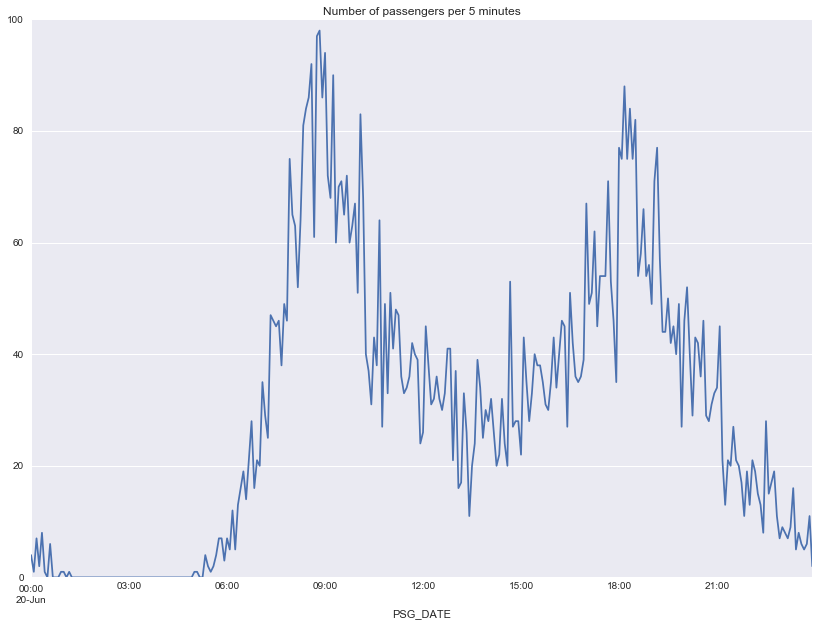

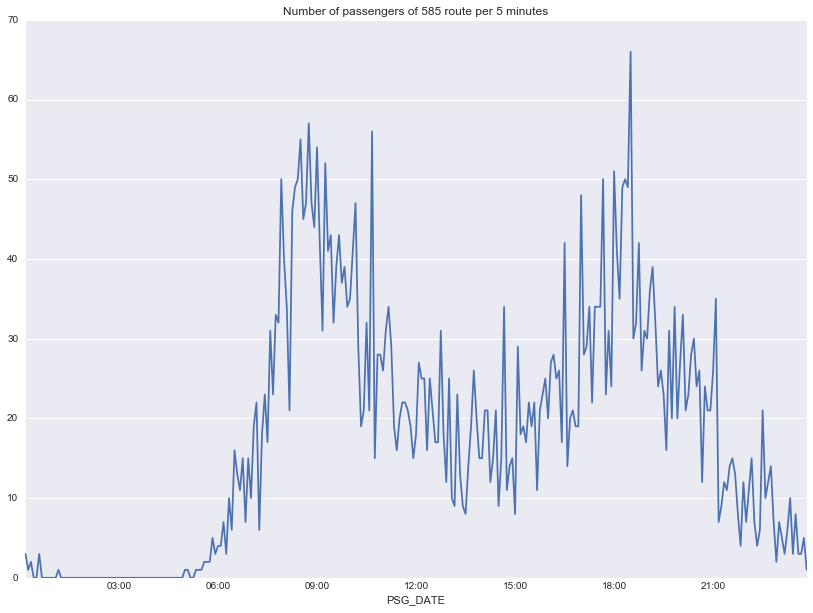

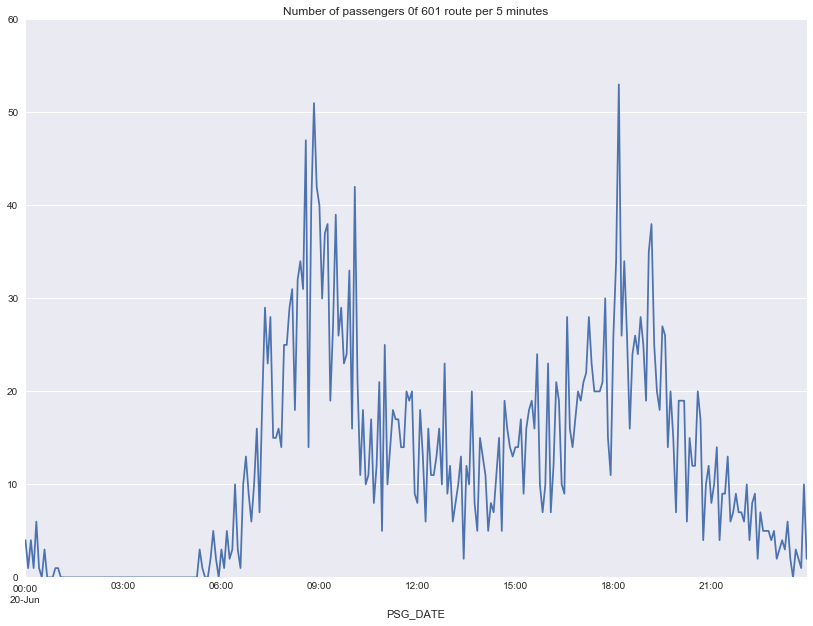

In [38]:
sample = data.resample('5T', on = 'PSG_DATE')['counter'].sum()
sample.plot(x='PSG_DATE', y='counter', rot=0, figsize=(14, 10), grid=True, title = 'Number of passengers per 5 minutes')
plt.show()
sample = pass585.resample('5T', on = 'PSG_DATE')['counter'].sum()
sample.plot(x='PSG_DATE', y='counter', rot=0, figsize=(14, 10), grid=True, title = 'Number of passengers of 585 route per 5 minutes')
plt.show()
sample = pass601.resample('5T', on = 'PSG_DATE')['counter'].sum()
sample.plot(x='PSG_DATE', y='counter', rot=0, figsize=(14, 10), grid=True, title = 'Number of passengers 0f 601 route per 5 minutes')
plt.show()

In [50]:
data['PRICE'].value_counts() #количество проходов по сттоимости проезда

36    4899
20    2895
0      786
Name: PRICE, dtype: int64

In [51]:
pass585['PRICE'].value_counts()

36    2886
20    1715
0      499
Name: PRICE, dtype: int64

In [52]:
pass601['PRICE'].value_counts()

36    2013
20    1180
0      287
Name: PRICE, dtype: int64

In [85]:
buses = data.groupby('PSG_DEVICE').sum()['counter']
buses.describe() #статистика по отдельным автобусам

count    182.000000
mean      47.142857
std       28.733706
min        1.000000
25%       25.250000
50%       45.000000
75%       59.750000
max      170.000000
Name: counter, dtype: float64

In [69]:
view = data.groupby('PASS_NMBR').sum()
viewm = data.groupby('PASS_NMBR').mean()

In [75]:
view[(view['counter'] >1)].groupby('PRICE')['counter'].describe()

,count,mean,std,min,25%,50%,75%,max
PRICE,,,,,,,,
0,15.0,2.066667,0.258199,2.0,2.0,2.0,2.0,3.0
20,96.0,2.041667,0.200875,2.0,2.0,2.0,2.0,3.0
36,211.0,2.028436,0.166610,2.0,2.0,2.0,2.0,3.0
40,15.0,2.133333,0.351866,2.0,2.0,2.0,2.0,3.0
56,1021.0,2.035260,0.189764,2.0,2.0,2.0,2.0,4.0
72,333.0,2.015015,0.144424,2.0,2.0,2.0,2.0,4.0
76,42.0,3.142857,0.354169,3.0,3.0,3.0,3.0,4.0
92,62.0,3.032258,0.178127,3.0,3.0,3.0,3.0,4.0
96,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0


In [42]:
a = len(data['PASS_NMBR'].unique()) #количество различных пассажиров
b = len(pass585['PASS_NMBR'].unique()) #количество различных пассажиров 585
c = len(pass601['PASS_NMBR'].unique()) #количество различных пассажиров 601
print a, b, c

6543 4227 2964


In [45]:
a = len(data['PSG_TRANSACTION'].unique()) #количество транзакций
b = len(pass585['PSG_TRANSACTION'].unique()) #количество транзакций 585
c = len(pass601['PSG_TRANSACTION'].unique()) #количество транзакций 601
print a, b, c

7304 3834 3474


In [47]:
a = len(data['PSG_TRANSACTION']) #количество транзакций
b = len(pass585['PSG_TRANSACTION']) #количество транзакций 585
c = len(pass601['PSG_TRANSACTION']) #количество транзакций 601
print a, b, c

8580 5100 3480


1) Графики не показали ничего удивительного: люди ездят на работу и с работы в определенное время, следовательно возрастает востребованность транспорта, нагрузки на сеть. Максимальные нагрузки в 9 утра и 6 вечера. Полезность данного факта при расширении географии действия системы заключается  в перераспределении нагрузок (хотя я не очень пока что понимаю техническую часть действия системы) при работе с разными часовыми поясами. Также это предполагает принятие некоторых мер предосторожности при вводе в эксплуатацию системы в новом городе: можно предсказать в какие часы может произойти перегрузка и/или сбой.

2) В среднем один билет используется 1-2 раза в день. В то время как через каждый из 182 валидаторов проходит в среднем 28 человек. максимум -- 180, минимум -- 1. Можно вытащить номера валидаторов с этими значениями. но мне пока что неясно зачем: для транспортной компании это могло бы послужить коррекцией маршрутов автобусов. в ситуации системы оплаты проезда перспективы мне пока что не ясны. Наиболее часто используемая стоимость -- 36. Как видно из дальнейших результатов, это показывает, что бОльшая часть пассажиров ездят на данных автобусах один раз. Бесплатных же поездок порядка 15%. 

3) Возник вопрос касательно транзакций: по идее, каждая транзакция должна иметь свой уникальный номер. Как минимум, чтобы её можно было отследить. Если я верно понимаю этот смысл номера транзакции, то тот факт, что количество транзакций -- 8580, а транзакций с уникальными номерами среди них -- 7304, немного смущает. Особенно, если учесть, что это только за сутки. Ведь если за день прошли две транзакции с одинаковым номером, то как производить контроль оплаты проезда? какую из двух транзакций выбирает система?

4) Метод пристального взгляда на листы excel также выявил ситуацию, что есть моменты, когда система неверно определяет первый проход по билету или же нет. Номер билета совпадает, но дважды указано, что это первый проход. Два не первых прохода -- нормально, по этим билетам можно ездить не только на этих маршрутах. но два первых прохода, учитывая, что после первого прохода стоимость (как это следует из метода пристального взгляда, ибо нет ни одного повторного прохода по цене 36) снижается.
<img src="image1.png"> 

In [94]:
#len(data['PSG_DEVICE'].unique())
#pd.crosstab(data['PL_ID'], data['PSG_DEVICE']) 

Чуть менее очевидные вещи:

1) Корреляции цены и времени поездок

2) Корреляции времени и средней цены билета



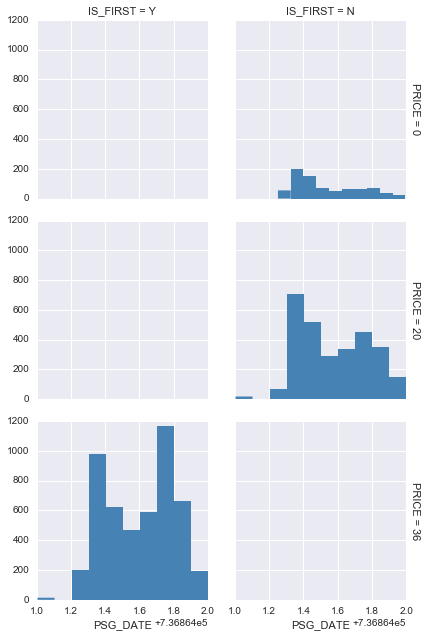

In [100]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.FacetGrid(data, row="PRICE", col="IS_FIRST", margin_titles=True)
#bins = np.linspace()
g.map(plt.hist, "PSG_DATE", color="steelblue",  lw=0)

Здесь я сделала вывод о том, что первые поездки стоят 36 рублей, а последующие 20 или 0 в зависимости от того, какая это по счёту поездка. Так же можно сделать вывод о том, что льготных проездных нет: иначе бы в левом верхнем квадрате была хоть  какая-нибудь активность. Однако, последнее утверждение нельзя считать верным, основываясь только на данных за один день на этих маршрутах.

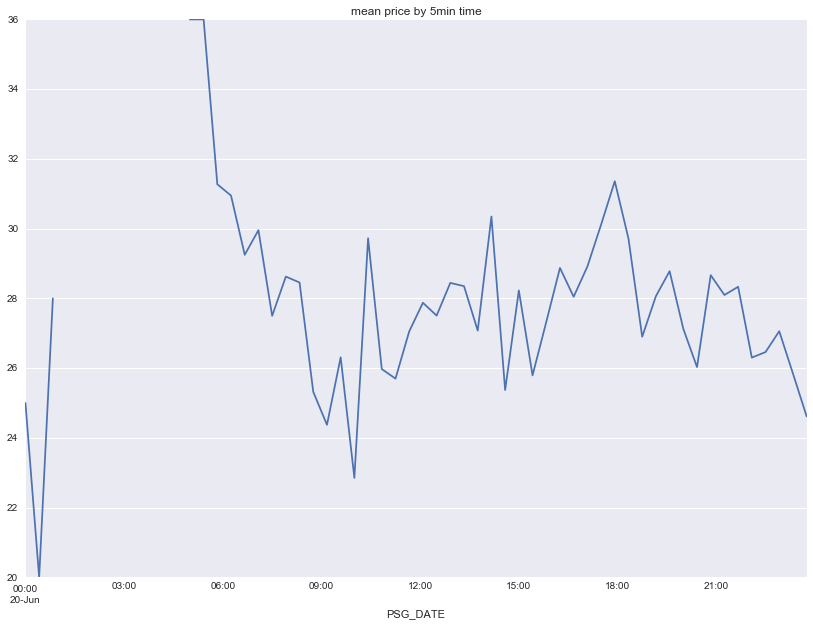

In [112]:
sample = pass601.resample('25T', on = 'PSG_DATE')['PRICE'].mean()
sample.plot(x='PRICE', y='PSG_DATE' , rot=0, figsize=(14, 10), grid=True, title = 'mean price by 25min time')

т.е. наиболее дорогие поездки -- утренние. Что, опять же, неудивительно, ведь они по больше части первые.

## А что дальше?

На мой взгляд, наибольший интерес и, к сожалению, сложность представляет собой определение типа билета и интенсивность его использования. Однако, возможно, это гораздо проще вычленяется из номера билета просто по принципу того, как их нумеруют, нежели из попыток определения того, какая стоимость и за сколько поездок получилась у каждого билета (собственно, таблица view была именно для этого). Это могло бы помочь при определении тарифов на проезд, и стратегий пополнения. В совокупности с историей пополнений это могло бы позволить сделать "скоринг" для определения возможности клиента "уходить в минус".


## Заключение

За полтора дня, что я уделила этому заданию, вышесказанное --- это тот объем анализа, который я смогла выполнить, регулярно обращаясь к документации и ранее выполненным на python работам. Безусловно, здесь были ещё некоторые таблицы и графики. Но их присутствие имело здесь ещё меньше смысла, чем последний график.

Больше всего тормозило работу то, что изначально мною не было задано уточняющих вопросов о конкретном виде того результата, который вы хотели от меня увидеть. Потому что приведённые средние значения навряд ли принесут огромную пользу. И в то же время каких-то вопросов, на которые требуется ответ, как и понимания специфики работы компании для того, чтобы поставить свои вопросы, почти что нет. 

Спасибо за уделённое время и внимание.